In [292]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go

df = pd.read_csv('/Users/lucazosso/Desktop/IE_Course/Term_2/Python II/Group_Assignement/python_grp3/data/bike_data_cleaned_features.csv', index_col='id')

df.head()

,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp_celsius,...,Rolling_Avg_Rent_2_h,Rolling_Avg_Rent_24_h,Rolling_Avg_Rent_168_h,hourly_rental_deviation,hourly_rental_deviation_label,Lagged_Rent_1h,count_prev_week_same_hour,log_total_bike_ct,temp_type_diff,wind_cooling_effect
id,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,...,16.0,16.000000,16.000000,-20.222222,below_average,0.0,0.0,2.833213,-0.0479,0.0
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,...,28.0,28.000000,28.000000,6.555556,above_average,16.0,0.0,3.713572,-0.0527,0.0
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,...,36.0,29.333333,29.333333,6.555556,above_average,40.0,0.0,3.496508,-0.0527,0.0
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,...,22.5,25.250000,25.250000,0.444444,above_average,32.0,0.0,2.639057,-0.0479,0.0
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,...,7.0,20.400000,20.400000,-2.888889,below_average,13.0,0.0,0.693147,-0.0479,0.0


In [293]:
df.dtypes

date                              object
season                             int64
year                               int64
month                              int64
hour                               int64
is_holiday                         int64
weekday                            int64
is_workingday                      int64
weather_condition                  int64
temp_celsius                     float64
atem_celsius                     float64
humidity                         float64
windspeed                        float64
casual_user_ct                     int64
registered_user_ct                 int64
total_bike_ct                      int64
year_month                        object
day_part                          object
rush_hour                          int64
casual_to_registered_ratio       float64
Rolling_Avg_Rent_2_h             float64
Rolling_Avg_Rent_24_h            float64
Rolling_Avg_Rent_168_h           float64
hourly_rental_deviation          float64
hourly_rental_de

In [294]:
#Some Preprocessing
cat_var = df.select_dtypes(include=['object']).columns

for col in cat_var:
    if col != 'date':
        print(col, df[col].unique())

df.drop(columns=['year_month'], inplace=True)
# encoded to use 0 and 1 for binary variables
df['hourly_rental_deviation_label'] = df['hourly_rental_deviation_label'].map({'below_average': 0, 'above_average': 1})
df.drop(columns=['hourly_rental_deviation'], inplace=True)

# use pd.get_dummies for day_part
day_part_dummies = pd.get_dummies(df['day_part'], prefix='day_part')
df = pd.concat([df, day_part_dummies], axis=1)
df.drop(columns=['day_part'], inplace=True)

year_month ['2011-01-01' '2011-02-01' '2011-03-01' '2011-04-01' '2011-05-01'
 '2011-06-01' '2011-07-01' '2011-08-01' '2011-09-01' '2011-10-01'
 '2011-11-01' '2011-12-01' '2012-01-01' '2012-02-01' '2012-03-01'
 '2012-04-01' '2012-05-01' '2012-06-01' '2012-07-01' '2012-08-01'
 '2012-09-01' '2012-10-01' '2012-11-01' '2012-12-01']
day_part ['night' 'morning' 'afternoon' 'evening']
hourly_rental_deviation_label ['below_average' 'above_average']


In [295]:
#set date as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [296]:
correlation_matrix = df.corrwith(df['total_bike_ct']).abs().sort_values(ascending=False)
# filter only correlations above 0.5
correlation_matrix


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


total_bike_ct                    1.000000
registered_user_ct               0.972151
Rolling_Avg_Rent_2_h             0.960161
Lagged_Rent_1h                   0.843820
count_prev_week_same_hour        0.821747
log_total_bike_ct                0.820513
casual_user_ct                   0.694564
rush_hour                        0.608212
day_part_night                   0.482786
Rolling_Avg_Rent_24_h            0.418827
temp_celsius                     0.404772
atem_celsius                     0.400929
hour                             0.394071
Rolling_Avg_Rent_168_h           0.390301
hourly_rental_deviation_label    0.325669
humidity                         0.322911
day_part_evening                 0.315206
wind_cooling_effect              0.306052
temp_type_diff                   0.256288
year                             0.250495
day_part_afternoon               0.203881
season                           0.178056
weather_condition                0.142426
month                            0

In [297]:
df.shape

(17379, 30)

In [298]:
df.sort_index(inplace=True)
df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp_celsius,atem_celsius,...,hourly_rental_deviation_label,Lagged_Rent_1h,count_prev_week_same_hour,log_total_bike_ct,temp_type_diff,wind_cooling_effect,day_part_afternoon,day_part_evening,day_part_morning,day_part_night
date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,...,0,0.0,0.0,2.833213,-0.0479,0.0,False,False,False,True
2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,...,1,16.0,0.0,3.713572,-0.0527,0.0,False,False,False,True
2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,...,1,40.0,0.0,3.496508,-0.0527,0.0,False,False,False,True
2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,...,1,32.0,0.0,2.639057,-0.0479,0.0,False,False,False,True
2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,...,0,13.0,0.0,0.693147,-0.0479,0.0,False,False,False,True


In [299]:
df.index = df.index + pd.to_timedelta(df['hour'], unit='h')
df.head()

,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp_celsius,atem_celsius,...,hourly_rental_deviation_label,Lagged_Rent_1h,count_prev_week_same_hour,log_total_bike_ct,temp_type_diff,wind_cooling_effect,day_part_afternoon,day_part_evening,day_part_morning,day_part_night
2011-01-01 00:00:00,1,0,1,0,0,6,0,1,0.24,0.2879,...,0,0.0,0.0,2.833213,-0.0479,0.0,False,False,False,True
2011-01-01 01:00:00,1,0,1,1,0,6,0,1,0.22,0.2727,...,1,16.0,0.0,3.713572,-0.0527,0.0,False,False,False,True
2011-01-01 02:00:00,1,0,1,2,0,6,0,1,0.22,0.2727,...,1,40.0,0.0,3.496508,-0.0527,0.0,False,False,False,True
2011-01-01 03:00:00,1,0,1,3,0,6,0,1,0.24,0.2879,...,1,32.0,0.0,2.639057,-0.0479,0.0,False,False,False,True
2011-01-01 04:00:00,1,0,1,4,0,6,0,1,0.24,0.2879,...,0,13.0,0.0,0.693147,-0.0479,0.0,False,False,False,True


__Time Series Split Exploration__

In [300]:
#This was for timeseries split --> we decided to go traditional way
# df['hour'].unique()

# # Update the index with the hour value as formation yyyy-mm-dd hh
# df.index = df.index + pd.to_timedelta(df['hour'], unit='h')
# df.drop(columns=['hour', 'year','month'], inplace=True)

# df.head()

In [301]:
# # Define the max number of folds I can do:
# total_observations = 17379
# test_set_size = 168  # One week's worth of hourly observations

# ratio = test_set_size / total_observations
# max_splits = (total_observations - test_set_size) // test_set_size

# print("Maximum possible splits:", max_splits, "ratio:", format(ratio, '.2f'))


In [302]:
#create a random variable¨
df['random'] = np.random.rand(df.shape[0])

# Modeling Starts here

__Training and Testing Data__

Here some thoughts: As we can saw in EDA that our data shows clear seasonal trends, we will split our  data with a rolling window of one week!

In [376]:
# determine y and X

cols_to_drop_after_random = ['weekday',
 'wind_cooling_effect',
 'day_part_morning',
 'temp_type_diff',
 'is_workingday',
 'month',
 'windspeed',
 'day_part_evening',
 'day_part_afternoon',
 'season',
 'is_holiday',
 'year',
 'day_part_night']

y = df['total_bike_ct']
X = df.drop(columns=['total_bike_ct', 'log_total_bike_ct', 'registered_user_ct','casual_user_ct', 'Rolling_Avg_Rent_2_h', 'Lagged_Rent_1h'])

seed = 96

In [377]:
X.columns

Index(['season', 'year', 'month', 'hour', 'is_holiday', 'weekday',
       'is_workingday', 'weather_condition', 'temp_celsius', 'atem_celsius',
       'humidity', 'windspeed', 'rush_hour', 'casual_to_registered_ratio',
       'Rolling_Avg_Rent_24_h', 'Rolling_Avg_Rent_168_h',
       'hourly_rental_deviation_label', 'count_prev_week_same_hour',
       'temp_type_diff', 'wind_cooling_effect', 'day_part_afternoon',
       'day_part_evening', 'day_part_morning', 'day_part_night', 'random'],
      dtype='object')

In [378]:
# Use robust scaler to scale the X data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

__Model Baseline__

Here we split 70/30 with shuffle = False as it is time series.

In [379]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=seed, shuffle=False)

# #implement corss validation
# kf = KFold(n_splits=21, shuffle=False, random_state=seed)

# Initialize the RandomForestRegressor with your chosen hyperparameters (or defaults)
rf = RandomForestRegressor(random_state=seed)

# Optionally, you can fit the model on the full training data after cross-validation
rf.fit(X_train, y_train)

# And then evaluate it on the validation set
predictions_val = rf.predict(X_test)
predictions_train = rf.predict(X_train)

mae = mean_absolute_error(y_test, predictions_val)
mse = mean_squared_error(y_test, predictions_val)
r2 = r2_score(y_test, predictions_val)

mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

print(f'Validation MAE: {mae}')
print(f'Validation MSE: {mse}')
print(f'Validation R2: {r2}')
print(f'Train MAE: {mae_train}')
print(f'Train MSE: {mse_train}')
print(f'Train R2: {r2_train}')


Validation MAE: 46.122660145761415
Validation MSE: 5284.0147577100115
Validation R2: 0.8911982371301201
Train MAE: 8.820644471845458
Train MSE: 220.0551134401973
Train R2: 0.9905468834798328


In [380]:
df_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

df_importances.sort_values(by='importance', ascending=False, inplace=True)
df_importances['importance'] = df_importances['importance'].map('{:.3}'.format)
df_importances

,feature,importance
17,count_prev_week_same_hour,0.521
3,hour,0.167
14,Rolling_Avg_Rent_24_h,0.112
12,rush_hour,0.062
13,casual_to_registered_ratio,0.0193
10,humidity,0.0182
7,weather_condition,0.0147
15,Rolling_Avg_Rent_168_h,0.0138
9,atem_celsius,0.0101
16,hourly_rental_deviation_label,0.00849


In [326]:
list(df_importances['feature'][df_importances['importance'].astype(float) < 0.00573])

['weekday',
 'wind_cooling_effect',
 'day_part_morning',
 'temp_type_diff',
 'is_workingday',
 'month',
 'windspeed',
 'day_part_evening',
 'day_part_afternoon',
 'season',
 'is_holiday',
 'year',
 'day_part_night']

In [381]:
# Taking the last week in the dataset for validation
y_val = df['total_bike_ct'][-24*7:]
pred_val = rf.predict(X[-24*7:])

residuals = y_val - pred_val
mae = mean_absolute_error(y_val, pred_val)
print(f'Validation MAE: {mae}')

Validation MAE: 269.77482142857144


/Users/lucazosso/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



## Using an Expanding Window split

In [335]:
initial_train_size = int(len(X) * 0.50)  # Start with 50% of the data for training
step_size = 24*7  # Move forward a week at each step

folds = []

for end in range(initial_train_size, len(X), step_size):
    train_indices = list(range(end))
    test_indices = list(range(end, end + step_size))
    folds.append((train_indices, test_indices))

print(len(folds))

52


## Using an Rolling Window split

In [362]:
initial_train_size = int(len(X) * 0.50)  # Initial size of the training set
window_size = initial_train_size  # Fixed window size for training
step_size = 24*7  # Move forward a week at each step

folds = []

# Start the first training window at the beginning of the dataset
start = 0

while start + window_size + step_size <= len(X):
    train_indices = list(range(start, start + window_size))
    test_indices = list(range(start + window_size, start + window_size + step_size))
    folds.append((train_indices, test_indices))
    start += step_size  # Move the window forward by step_size

print(len(folds))


51


In [383]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Example model - replace with your model
model = RandomForestRegressor()

# To store scores for each fold
scores_dict = {
    'rmse': [],
    'mae': [],
    'r2': [],
    'rmse_train': [],
    'mae_train': [],
    'r2_train': []
}

fold_num = 1

print(f"Running {len(folds)} Folds...")
for train_indices, test_indices in folds:
    if test_indices[-1] >= len(X):
        test_indices = [i for i in test_indices if i < len(X)]
    
    print(f"Training model on fold {fold_num}...")
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    predictions = model.predict(X_test)
    
    # Calculate the error metrics on test
    rmse_rf = mean_squared_error(y_test, predictions)  # RMSE
    mae_rf = mean_absolute_error(y_test, predictions)  # MAE
    r2_rf = r2_score(y_test, predictions)  # R2
    
    # Make predictions on the train set
    predictions_train = model.predict(X_train)

    # Calculate the error metrics on train
    rmse_rf_train = mean_squared_error(y_train, predictions_train)  # RMSE
    mae_rf_train = mean_absolute_error(y_train, predictions_train)  # MAE
    r2_rf_train = r2_score(y_train, predictions_train)  # R2

    # Store the train scores
    scores_dict['rmse_train'].append(rmse_rf_train)
    scores_dict['mae_train'].append(mae_rf_train)
    scores_dict['r2_train'].append(r2_rf_train)
    
    # Store the test scores
    scores_dict['rmse'].append(rmse_rf)
    scores_dict['mae'].append(mae_rf)
    scores_dict['r2'].append(r2_rf)
    # Print the fold number
    print(f"Fold {fold_num} done")
    
    # Increment the counter
    fold_num += 1

# Calculate the average performance across all folds
average_rmse_test = np.mean(scores_dict['rmse'])
average_mae_test = np.mean(scores_dict['mae'])
average_r2_test = np.mean(scores_dict['r2'])
average_rmse_train = np.mean(scores_dict['rmse_train'])
average_mae_train = np.mean(scores_dict['mae_train'])
average_r2_train = np.mean(scores_dict['r2_train'])

print(f"Average RMSE_val: {average_rmse_test}")
print(f"Average RMSE_train: {average_rmse_train}")
print(f"Average MAE_val: {average_mae_test}")
print(f"Average MAE_train: {average_mae_train}")
print(f"Average R2_val: {average_r2_test}")
print(f"Average R2_train: {average_r2_train}")



Running 51 Folds...
Training model on fold 1...
Fold 1 done
Training model on fold 2...
Fold 2 done
Training model on fold 3...
Fold 3 done
Training model on fold 4...
Fold 4 done
Training model on fold 5...
Fold 5 done
Training model on fold 6...
Fold 6 done
Training model on fold 7...
Fold 7 done
Training model on fold 8...
Fold 8 done
Training model on fold 9...
Fold 9 done
Training model on fold 10...
Fold 10 done
Training model on fold 11...
Fold 11 done
Training model on fold 12...
Fold 12 done
Training model on fold 13...
Fold 13 done
Training model on fold 14...
Fold 14 done
Training model on fold 15...
Fold 15 done
Training model on fold 16...
Fold 16 done
Training model on fold 17...
Fold 17 done
Training model on fold 18...
Fold 18 done
Training model on fold 19...
Fold 19 done
Training model on fold 20...
Fold 20 done
Training model on fold 21...
Fold 21 done
Training model on fold 22...
Fold 22 done
Training model on fold 23...
Fold 23 done
Training model on fold 24...
Fol

In [ ]:
# Average RMSE_val: 4197.31561372613
# Average RMSE_train: 238.15653117345667
# Average MAE_val: 40.671643660301456
# Average MAE_train: 9.579467817237525
# Average R2_val: 0.8767983153630095
# Average R2_train: 0.9904100618378769

In [382]:
import numpy as np
import plotly.graph_objects as go

# Select a random week
random_week_start = np.random.choice(df.index[:-24*7])

# Get the data for this week
y_val = df['total_bike_ct'][random_week_start:random_week_start+pd.DateOffset(days=7)]
X_val = X.loc[random_week_start:random_week_start+pd.DateOffset(days=7)]

# Predict the values for this week
pred_val = model.predict(X_val)

# Calculate MAPE
mape = np.mean(np.abs((y_val - pred_val) / y_val))

# Plot the predictions
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_val.index, y=y_val, mode='lines', name='actual'))
fig.add_trace(go.Scatter(x=y_val.index, y=pred_val, mode='lines', name='predicted'))
fig.update_layout(title=f'Predictions vs Actuals (MAPE: {mape:.2f}%)', xaxis_title='Date', yaxis_title='Total Bike Count')
fig.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- hour
Feature names seen at fit time, yet now missing:
- Lagged_Rent_1h
- Rolling_Avg_Rent_2_h


## Using Randomize search

## Using linear Model

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


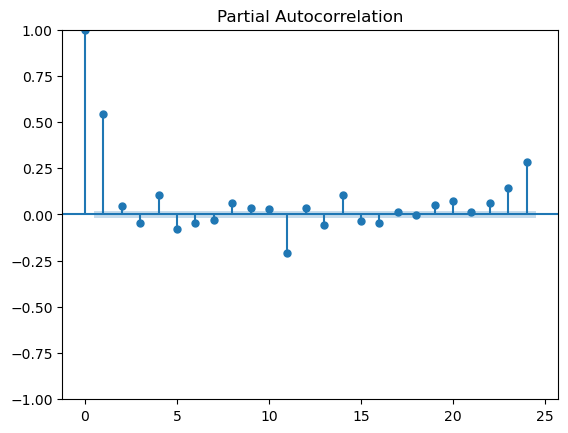

In [352]:
# fit a linear model and analyze the PACF and ACF of the residuals using sklearn
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt


# Fit a linear model to X_train and y_train
model = OLS(y_train, add_constant(X_train)).fit()

# Get the residuals from the model
residuals = model.resid

# Plot the residuals
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_train.index, y=residuals, mode='lines', name='residuals'))
fig.update_layout(title='Residuals of the Linear Model', xaxis_title='Date', yaxis_title='Residuals')
fig.show()

# Plot the ACF and PACF of the residuals
#fig, ax = plt.subplots(1, 2, figsize=(14, 4))
#plot_acf(residuals, ax=ax[0], lags=24*7)
plot_pacf(residuals, lags=24)
plt.show()


In [353]:
#plot an ARIMA model with autoregressive lag of 24 on the residuals
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model to the residuals
model = ARIMA(residuals, order=(24, 0, 0)).fit()

# Get the predictions of the residuals
pred_residuals = model.predict()

# Plot the actual residuals and the predicted residuals
fig = go.Figure()
fig.add_trace(go.Scatter(x=y_train.index, y=residuals, mode='lines', name='actual residuals'))
fig.add_trace(go.Scatter(x=y_train.index, y=pred_residuals, mode='lines', name='predicted residuals'))
fig.update_layout(title='Actual vs Predicted Residuals', xaxis_title='Date', yaxis_title='Residuals')
fig.show()



/Users/lucazosso/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/lucazosso/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/lucazosso/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
